# DEMO VOTING FROM NOTEBOOK

Fichier chargé : C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\FINALE\Preprocessing\dfs\X_test_translated_BERT.csv


,designation,description,productid,imageid,prdtypecode,txt,txt_0,txt_fr
0,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,NaN,5862738,393356830,2280,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,Afrique Contemporaine N 212 Hiver 2004 Dossier...,Afrique Contemporaine N 212 Hiver 2004 Dossier...
1,Walter Scott Oeuvres Complètes Tomes 3456 10 E...,NaN,3735707499,1239242410,2403,Walter Scott Oeuvres Complètes Tomes 3456 10 E...,Walter Scott Oeuvres Compl tes Tomes 3456 10 E...,Walter Scott Oeuvres Complètes Tomes 3456 10 E...
2,Véhicule Star Wars A-Ast5,véhicule vintage de la saga star wars le A-AST5,279822475,978593209,1140,Véhicule Star Wars A-Ast5 véhicule vintage de ...,V hicule Star Wars A Ast5 v hicule vintage de ...,Véhicules Star Wars A Ast5 véhicules vintage d...
3,Lindner 2365-2115ce Coin Case Nera Xl With 3 T...,Timeless elegance a clear design versatility f...,3817904723,1248853903,2522,Lindner 2365-2115ce Coin Case Nera Xl With 3 T...,Lindner 2365 2115ce Coin Case Nera Xl With 3 T...,Lindner 2365 2115ce Coffret pour pièces de mon...
4,Rideau A Oeillets Plastique Polyester Uni Esse...,rêt-à-poser ce rideau s'installe facilement et...,2333136838,1136619798,1920,Rideau A Oeillets Plastique Polyester Uni Esse...,Rideau A Oeillets Plastique Polyester Uni Esse...,Rideau A Oeillets Plastique Polyester Uni Esse...


Prédictions:   4%|▍         | 348/8492 [00:55<24:22,  5.57it/s]C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\FINALE\GITHUB\Multimodale voting\multimodal_predictor_voting.py:48: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
Prédictions:  27%|██▋       | 2331/8492 [06:15<26:15,  3.91it/s]C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\FINALE\GITHUB\Multimodale voting\multimodal_predictor_voting.py:48: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
Prédictions:  54%|█████▍    | 4576/8492 [11:57<08:18,  7.85it/s]C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\FINALE\GITHUB\Multimodale voting\multimodal_predictor_voting.py:48: MarkupResemblesLoca

                             precision    recall  f1-score   support

             Livre occasion       0.72      0.79      0.75       312
Jeu vidéo, accessoire tech.       0.82      0.84      0.83       251
         Accessoire Console       0.83      0.91      0.87       168
             Console de jeu       1.00      0.90      0.95        83
                   Figurine       0.83      0.80      0.82       267
           Carte Collection       0.95      0.95      0.95       395
                Jeu Plateau       0.65      0.64      0.64        77
  Jouet enfant, déguisement       0.78      0.78      0.78       487
             Jeu de société       0.75      0.63      0.68       207
                 Jouet tech       0.96      0.98      0.97       504
       Paire de chaussettes       0.95      0.89      0.92        80
    Jeu extérieur, vêtement       0.90      0.84      0.87       249
             Autour du bébé       0.86      0.85      0.85       324
         Mobilier intérieur      

,productid,predicted_label,predicted_category
0,5862738,2280,Revues et journaux
1,3735707499,2403,"Magazines, livres et BDs"
2,279822475,1140,Figurine
3,3817904723,2522,Bureautique et papeterie
4,2333136838,1920,Chambre


Résultats sauvegardés dans 'resultats_predictions_voting.csv'
Rapport de classification sauvegardé dans 'classification_report_voting.txt'
Matrice de confusion sauvegardée dans 'confusion_matrix_voting.png'
Exemple manuel → Prédiction : 2582 → Mobilier extérieur


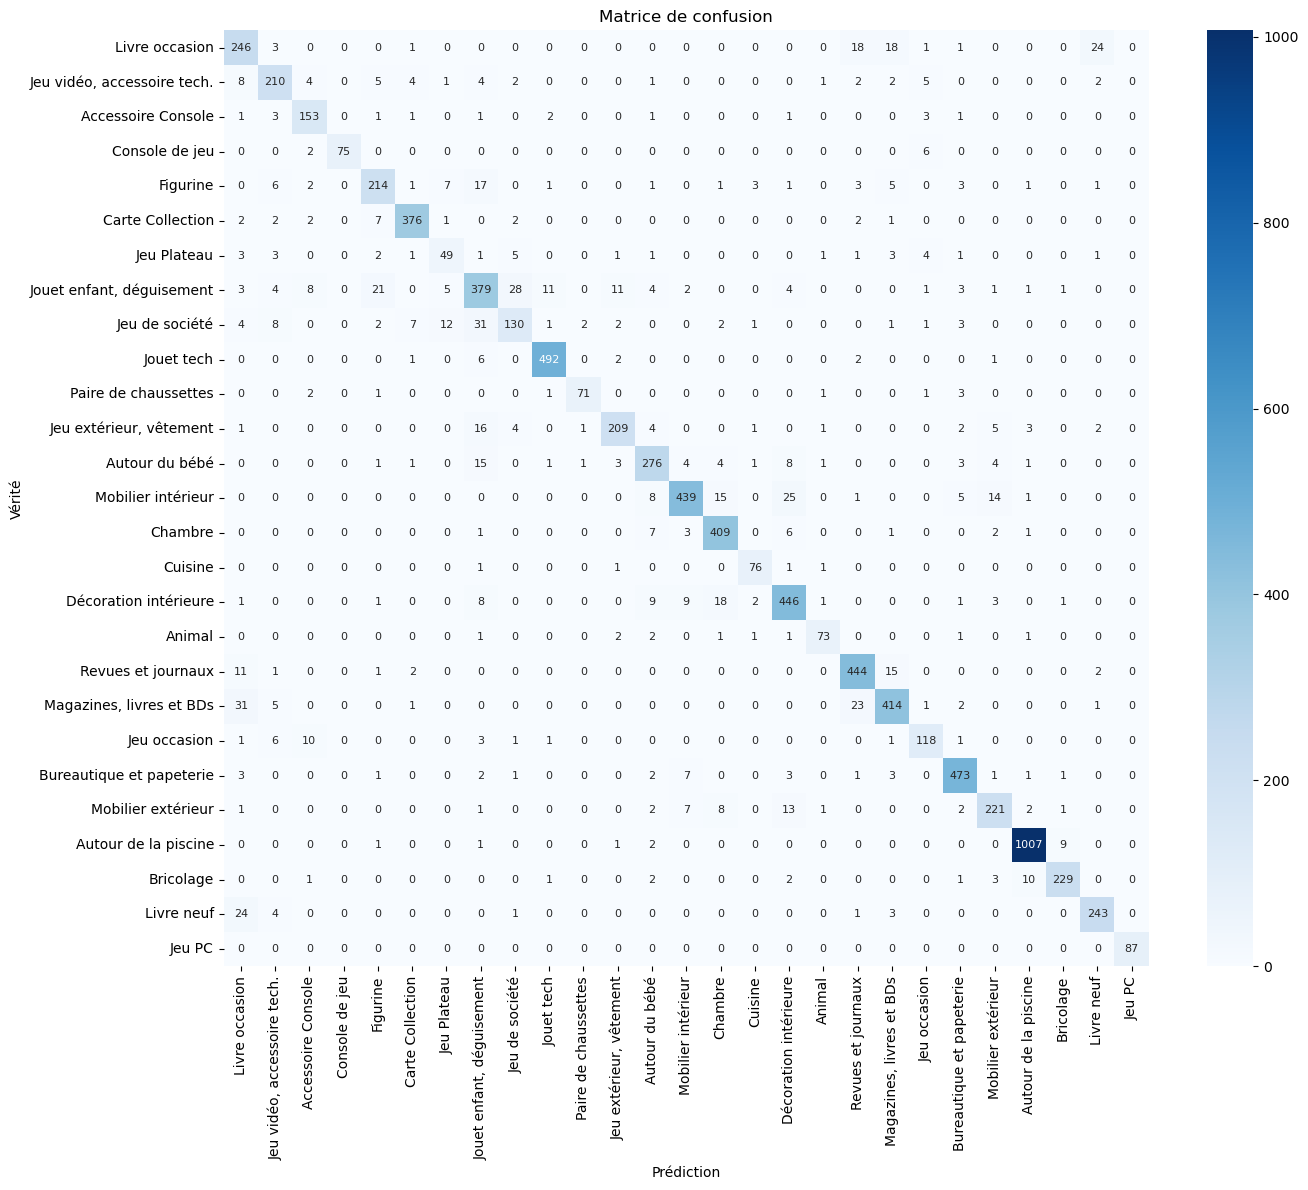

In [5]:
# Notebook de démonstration - Prédiction multimodale Rakuten
import pandas as pd
from multimodal_predictor_voting import predict_dataframe, predict_multimodal, label_to_string
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wrappers import CamembertWrapper, ResNetWrapper
# ---------------------------
# Dictionnaire label → nom de catégorie
# ---------------------------
labelcat = {
    10: "Livre occasion", 40: "Jeu vidéo, accessoire tech.", 50: "Accessoire Console",
    60: "Console de jeu", 1140: "Figurine", 1160: "Carte Collection", 1180: "Jeu Plateau",
    1280: "Jouet enfant, déguisement", 1281: "Jeu de société", 1300: "Jouet tech",
    1301: "Paire de chaussettes", 1302: "Jeu extérieur, vêtement", 1320: "Autour du bébé",
    1560: "Mobilier intérieur", 1920: "Chambre", 1940: "Cuisine", 2060: "Décoration intérieure",
    2220: "Animal", 2280: "Revues et journaux", 2403: "Magazines, livres et BDs",
    2462: "Jeu occasion", 2522: "Bureautique et papeterie", 2582: "Mobilier extérieur",
    2583: "Autour de la piscine", 2585: "Bricolage", 2705: "Livre neuf", 2905: "Jeu PC"
}

# ---------------------------
# Paramètres à personnaliser
# ---------------------------
csv_path = r"C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\FINALE\Preprocessing\dfs\X_test_translated_BERT.csv"
image_dir = r"C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\images\images\test"
image_path = os.path.join(image_dir, "image_959218573_product_231451737.jpg")
text_input = "Chaise pliante pour jardin en métal noir"

# ---------------------------
# Chargement du DataFrame
# ---------------------------
try:
    df = pd.read_csv(csv_path)
    print("Fichier chargé :", csv_path)
    display(df.head())
except Exception as e:
    print("Erreur lors du chargement :", e)

# ---------------------------
# Prédiction sur le DataFrame complet
# ---------------------------
try:
    df_results = predict_dataframe(df, image_dir=image_dir, text_col="txt_fr")
    print("Prédictions terminées")
    display(df_results[["productid", "predicted_label", "predicted_category"]].head())

    # Ajout du nom de la catégorie prédite
    df_results["predicted_category_name"] = df_results["predicted_label"].map(labelcat)

    # Sauvegarde des résultats
    df_results.to_csv("resultats_predictions_voting.csv", index=False)
    print("Résultats sauvegardés dans 'resultats_predictions_voting.csv'")

    # Évaluation si les vraies catégories sont disponibles
    if "prdtypecode" in df_results.columns:
        # Conversion en int pour éviter les erreurs de typage
        df_results["prdtypecode"] = df_results["prdtypecode"].astype(int)
        df_results["predicted_label"] = df_results["predicted_label"].astype(int)

        # Labels uniques et noms associés
        unique_labels = sorted(df_results["prdtypecode"].unique())
        label_names = [labelcat.get(lbl, str(lbl)) for lbl in unique_labels]

        # Rapport de classification avec noms
        report = classification_report(
            df_results["prdtypecode"],
            df_results["predicted_label"],
            target_names=label_names,
            zero_division=0
        )
        with open("classification_report_voting.txt", "w", encoding="utf-8") as f:
            f.write(report)
        print("Rapport de classification sauvegardé dans 'classification_report_voting.txt'")

        # Matrice de confusion
        cm = confusion_matrix(df_results["prdtypecode"], df_results["predicted_label"], labels=unique_labels)
        plt.figure(figsize=(14, 12))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=label_names, yticklabels=label_names,
                    annot_kws={"size": 8})
        plt.title("Matrice de confusion")
        plt.xlabel("Prédiction")
        plt.ylabel("Vérité")
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig("confusion_matrix_voting.png")
        print("Matrice de confusion sauvegardée dans 'confusion_matrix_voting.png'")

except Exception as e:
    print("Erreur pendant la prédiction sur le DataFrame :", e)

# ---------------------------
# Exemple de prédiction manuelle
# ---------------------------
try:
    pred = predict_multimodal(text_input, image_path)
    print(f"Exemple manuel → Prédiction : {pred} → {label_to_string(pred)}")
except Exception as e:
    print("Erreur lors de la prédiction manuelle :", e)
